In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy

!pip install pycountry
!pip install langdetect

In [1]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import time
import seaborn as sns
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

C:\ProgramData\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\akait\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akait\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akait\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# consumerKey = 'ZUfS3G79waVppsMf9HONVjYFf'
# consumerSecret = 'YnvYux23tKizR6JopsaSC3DmlpEIIbOIQvCI3tC7Ci0HhWJmg8'
# accessToken = '589281933-ZQwqrLbblM0Si0NXCjNOlvwJGwnR9xzaniIMo6Z3'
# accessTokenSecret = 'CRNsNnUKTZAUzpWNRsaWWliy8UrGhFaWoqvKHJZqOZWgh'

In [2]:
# Authentication 
#Chuka's keys
consumerKey = 'i9snFcEsKXI14Z99twYpIpY61'
consumerSecret = 'GWwNhoznzdeWaHoyN4iEYPnoDemiWAc8GAHPmAK2UDNlbO7YM6'
accessToken = '1213346230182395904-0hONPcO1qhatU94rw2EWByWX6fIGQY'
accessTokenSecret = 'D21J1KqR50At3BM9Jfmqm4b1hls32INVlmyCxaeSv70eD'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
#Spool tweets 

text_query = 'alcohol'
count = 500
try:
    tweets = tweepy.Cursor(api.search,q=text_query,geocode="-1.2874360,36.7963670,40km",since = "2020-01-01").items(count)
    tweets_list = [[tweet.user.screen_name,tweet.user.location,tweet.user.followers_count,
                    tweet.retweet_count,tweet.created_at, tweet.id, tweet.text] for tweet in tweets]
    tweets_df = pd.DataFrame(tweets_list)
    tweets_df.rename(columns = {0:'User', 1:'location',2:'Followers',3:'retweets',4:'date_created',
                               5:'tweet_id',6:'text'}, inplace = True)

except BaseException as e:
    print('failed on_status,',str(e))
    time.sleep(3)


tweets_df.rename(columns = {0:'User', 1:'location',2:'Followers',3:'retweets',4:'date_created',
                               5:'tweet_id',6:'text'}, inplace = True)
tweets_df

,User,location,Followers,retweets,date_created,tweet_id,text
0,geemogambi,nairobi,3086,19,2021-05-17 08:32:38,1394209232375980033,RT @Kimuzi_: Someone bought me alcohol even af...
1,AlWandaabz,"Nairobi, Kenya",168,0,2021-05-17 08:31:59,1394209067078504454,@_murageh A hangover means there’s a lot of bl...
2,Kastone_Paul,"Nairobi, Kenya",8366,19,2021-05-17 08:28:06,1394208088605999104,RT @Kimuzi_: Someone bought me alcohol even af...
3,MuisyoLeon,,75,152,2021-05-17 08:25:52,1394207526422556672,RT @smileycherry2: Quitting alcohol is one of ...
4,GhaflaKenya,"Nairobi, Kenya",285251,0,2021-05-17 08:25:09,1394207347371921408,”I am The Only Mother That Gives Her Children ...
5,MainaKimondo1,,2121,18,2021-05-17 08:22:40,1394206723867615234,RT @MOH_Kenya: Risk factors for hypertension i...
6,freeman366987,"Nairobi, Kenya",257,0,2021-05-17 08:21:46,1394206495978446852,@254_icon just drink alcohol while finding sol...
7,JerryBson,"Kabete, Kenya",8799,0,2021-05-17 08:20:22,1394206145120722945,@254_icon better alcohol postpones
8,Gad_triG,Nairobi,1691,19,2021-05-17 08:18:53,1394205771894824961,RT @Kimuzi_: Someone bought me alcohol even af...
9,ptlvanshii14,"Johannesburg, South Africa",9,35,2021-05-17 08:16:24,1394205145899044867,RT @KResearcher: A study done in 2008 showed t...


In [17]:
tweets_df = tweets_df[~tweets_df.text.str.contains("Job")]

In [10]:
tweets_df.to_csv('alcohol.csv')

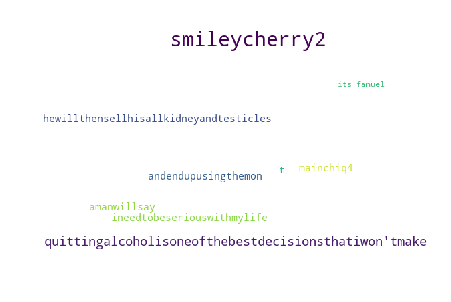

In [7]:
comment_words = ' '
stopwords = set(STOPWORDS)
stopwords.add('rt')
stopwords.add('https')
stopwords.add('co')
  
for val in tweets_df['text']:
    comment_words = comment_words + ' '
      
    val = str(val)  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words
  
  
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',max_words = 20, 
                stopwords = stopwords, 
                min_font_size = 12, collocations = False).generate(comment_words)

#wordcloud.recolor(color_func = grey_color_func)
                          
#plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
#plt.savefig('wordcloud'+ '_' + text_query+ '.png', facecolor='k', bbox_inches='tight') 
plt.show() 

##Sentiment Analysis

In [9]:
def percentage(part,whole):
 return 100 * float(part)/float(whole)

In [10]:
# Derive different sentiments

positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets_df.text:
  tweet_list.append(tweet)
  analysis = TextBlob(tweet)
  score = SentimentIntensityAnalyzer().polarity_scores(tweet)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  polarity += analysis.sentiment.polarity
  
  if neg > pos:
    negative_list.append(tweet)
    negative += 1
  elif pos > neg:
    positive_list.append(tweet)
    positive += 1
  
  elif pos == neg:
    neutral_list.append(tweet)
    neutral += 1

positive = percentage(positive, len(tweet_list))
negative = percentage(negative, len(tweet_list))
neutral = percentage(neutral, len(tweet_list))
polarity = percentage(polarity, len(tweet_list))
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [11]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ', len(tweet_list))
print('positive number: ', len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ', len(neutral_list))

total number:  242
positive number:  157
negative number:  62
neutral number:  23


In [12]:
#Creating PieChart

# labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]', 'Negative ['+str(negative)+'%]']
# sizes = [positive, neutral, negative]
# colors = ['yellowgreen', 'blue','red']
# patches, texts = plt.pie(sizes,colors=colors, startangle=90)
# plt.style.use('default')
# plt.legend(labels)
# plt.title('Sentiment Analysis Result for keyword = '+ text_query )
# plt.axis('equal')
# plt.show()

##Clean Tweets to analyse sentiment

In [13]:
tweet_list.drop_duplicates(inplace = True)    # Drop duplicates
len(tweet_list)

90

In [14]:
tweet_list

,0
0,RT @9_11_90s: Living in Nigeria should be cove...
2,@OGNAZti @CEOways_ @Oliverolisah @maxdiwailee ...
3,RT @IOladega: If car insurance wasn't mandated...
6,RT @aproko_doctor: I'm here again to beg for y...
7,"If car insurance wasn't mandated by law, most ..."
...,...
232,Did you miss the conversation on Health Insura...
233,RT @_TweetsbyOkey: Fintechs should be looking ...
236,Insurance brokers have been advised to leverag...
239,RT @proustmalone: US military propaganda loses...


In [15]:
stop_words = set(stopwords.words('english')) 
lemmatizer = WordNetLemmatizer() 

In [16]:
# function for text pre-processing
def tweet_cleaner(text):
    newString=re.sub(r'@[A-Za-z0-9]+','',text)                     #removing user mentions
    newString=re.sub("#","",newString)                             #removing hashtag symbol
    newString= re.sub(r'http\S+', '', newString)                   #removing links
    newString= re.sub(r"'s\b","",newString)                        #removing 's
    letters_only = re.sub("[^a-zA-Z]", " ", newString)             #Fetching out only letters
    lower_case = letters_only.lower()                              #converting everything to lowercase
    tokens = [w for w in lower_case.split() if not w in stop_words]#stopwords removal
    newString=''
    for i in tokens:                                                 
        newString=newString+lemmatizer.lemmatize(i)+' '            #converting words to lemma                               
    
    return newString.strip() 

In [17]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features



tw_list = pd.DataFrame(tweet_list)
# tw_list['text'] = tw_list[0]

# empty list to store tweets after pre-processing
cleaned_tweets = []

# pre-processing the tweets
for i in tw_list[0]:
    cleaned_tweets.append(tweet_cleaner(i))

#creating new column  
tw_list['text']= cleaned_tweets
tw_list

,0,text
0,RT @9_11_90s: Living in Nigeria should be cove...,rt living nigeria covered insurance policy co ...
2,@OGNAZti @CEOways_ @Oliverolisah @maxdiwailee ...,get insurance suppose someday
3,RT @IOladega: If car insurance wasn't mandated...,rt car insurance mandated law nigerian car own...
6,RT @aproko_doctor: I'm here again to beg for y...,rt doctor beg money nigerian need medical help...
7,"If car insurance wasn't mandated by law, most ...",car insurance mandated law nigerian car owner ...
...,...,...
232,Did you miss the conversation on Health Insura...,miss conversation health insurance catch dr ab...
233,RT @_TweetsbyOkey: Fintechs should be looking ...,rt tweetsbyokey fintechs looking insurance com...
236,Insurance brokers have been advised to leverag...,insurance broker advised leverage digital solu...
239,RT @proustmalone: US military propaganda loses...,rt u military propaganda loses grip mind secon...


In [18]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
  score = SentimentIntensityAnalyzer().polarity_scores(row)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    tw_list.loc[index, 'sentiment'] = 'negative'
  
  elif pos > neg:
    tw_list.loc[index, 'sentiment'] = 'positive'
  
  else:
    tw_list.loc[index, 'sentiment'] = 'neutral'
    
  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @9_11_90s: Living in Nigeria should be cove...,rt living nigeria covered insurance policy co ...,0.000000,0.000000,negative,0.189,0.811,0.000,-0.2732
2,@OGNAZti @CEOways_ @Oliverolisah @maxdiwailee ...,get insurance suppose someday,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,RT @IOladega: If car insurance wasn't mandated...,rt car insurance mandated law nigerian car own...,-0.100000,1.000000,positive,0.000,0.827,0.173,0.3182
6,RT @aproko_doctor: I'm here again to beg for y...,rt doctor beg money nigerian need medical help...,0.000000,0.000000,positive,0.000,0.748,0.252,0.4019
7,"If car insurance wasn't mandated by law, most ...",car insurance mandated law nigerian car owner ...,-0.100000,1.000000,positive,0.000,0.796,0.204,0.3182
10,RT @Auntyadaa: If you truly love someone then ...,rt truly love someone need prove buy chi home ...,0.428571,0.585714,positive,0.000,0.550,0.450,0.8689
14,@VoctorYoung @CEOways_ @Oliverolisah @maxdiwai...,lack insurance enough histor,0.000000,0.500000,negative,0.434,0.566,0.000,-0.3182
15,Think MUTUAL ALWAYS @MutualPlc. We have got yo...,think mutual always got covered ranging life a...,0.050000,0.500000,positive,0.000,0.806,0.194,0.3400
23,RT @nneomaosumili: Now Hiring!\n\nSales Execut...,rt hiring sale executive location lekki indust...,0.200000,0.300000,neutral,0.000,1.000,0.000,0.0000
25,@Oluwatobi_xo @ToyosiGodwin @chinedumc92 Most ...,xo insurance mainly asset product,0.166667,0.333333,positive,0.000,0.615,0.385,0.3612


In [19]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [20]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

#Count_values for sentiment
count_values_in_column(tw_list,'sentiment')

,Total,Percentage
positive,53,58.89
negative,21,23.33
neutral,16,17.78


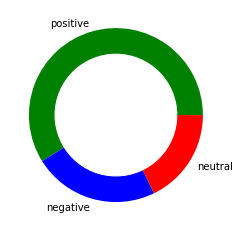

In [21]:
# create data for Pie Chart
piechart = count_values_in_column(tw_list,'sentiment')
names= piechart.index
size=piechart['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [22]:
#Function to Create Wordcloud
def create_wordcloud(text, pol):
#  mask = np.array(Image.open('cloud.png'))
 stopwords = set(STOPWORDS)
 wc = WordCloud(background_color='white',
 max_words=3000,
 stopwords=stopwords,
 repeat=True)
 wc.generate(str(text))
 wc.to_file(text_query + '_' + pol + '_'+'wc.png')
 print('Word Cloud Saved Successfully')
 path= text_query + '_' + pol + '_'+'wc.png'
 display(Image.open(path))

Word Cloud Saved Successfully


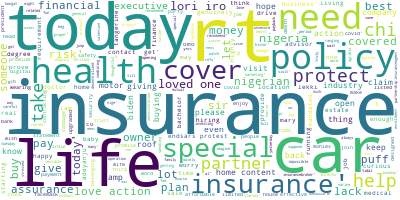

In [23]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list['text'].values, 'all')

Word Cloud Saved Successfully


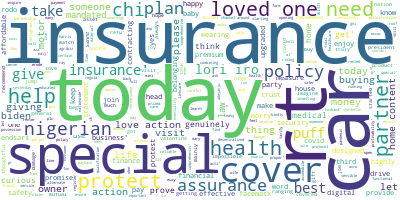

In [24]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive['text'].values, 'positive')

Word Cloud Saved Successfully


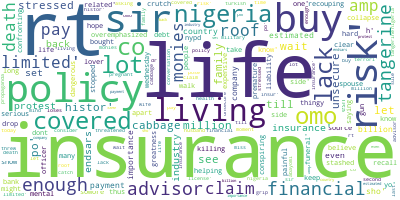

In [25]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative['text'].values, 'negative')

In [26]:
#Calculating tweet’s lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,60.19
neutral,59.44
positive,69.45


In [27]:
round(pd.DataFrame(tw_list.groupby('sentiment').text_word_count.mean()),2)

,text_word_count
sentiment,
negative,9.24
neutral,8.50
positive,10.60


##Top 25 trending hashtags from tweets

In [30]:
# function to collect hashtags
def hashtag_extract(text_list):
    hashtags = []
    # Loop over the words in the tweet
    for text in text_list:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)

    return hashtags

def generate_hashtag_freqdist(hashtags):
    a = nltk.FreqDist(hashtags)
    d = pd.DataFrame({'Hashtag': list(a.keys()),
                      'Count': list(a.values())})
    # selecting top 15 most frequent hashtags     
    d = d.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    plt.savefig(text_query + '_hashtag_frequency_dist.png')
    plt.show()

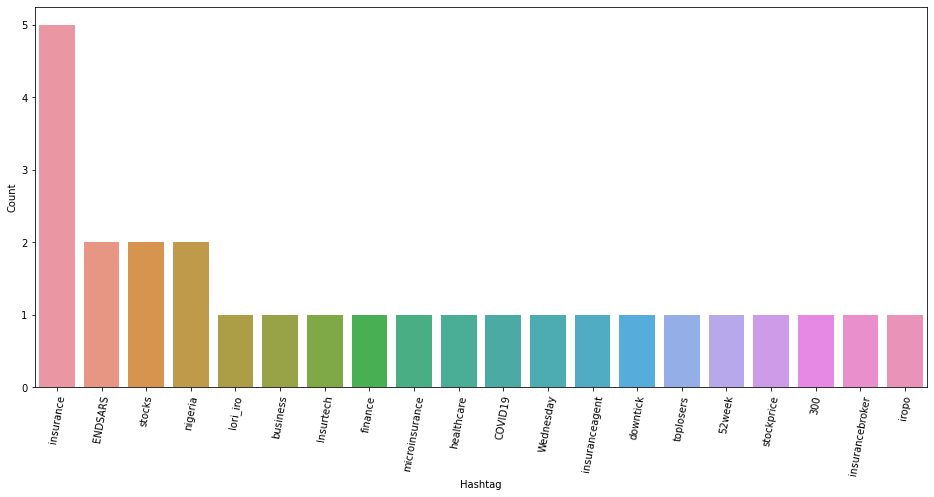

In [31]:
hashtags = hashtag_extract(tw_list[0])
hashtags = sum(hashtags, [])

generate_hashtag_freqdist(hashtags)

##Some additional stuff i'm still trying to play around with

In [29]:
#Removing Punctuation
def remove_punct(text):
 text = ''.join([char for char in text if char not in string.punctuation])
 text = re.sub('[0–9]+', '', text)
 return text
tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @daniel_matches: 📡📡📡📡📡📡📡📡📡📡\n*WHO IS Regis...,rt match registering next time wait man think ...,0.25000,0.4500,neutral,0.000,1.000,0.000,0.0000,60,11,rt match registering next time wait man think ...,"[rt, match, registering, next, time, wait, man...","[rt, match, registering, next, time, wait, man...","[rt, match, regist, next, time, wait, man, thi..."
1,"RT @Priye___: Friendship is an investment, you...",rt friendship investment indifferent people ex...,0.00000,0.0000,positive,0.154,0.598,0.248,0.2732,66,10,rt friendship investment indifferent people ex...,"[rt, friendship, investment, indifferent, peop...","[rt, friendship, investment, indifferent, peop...","[rt, friendship, invest, indiffer, peopl, expe..."
2,📡📡📡📡📡📡📡📡📡📡\n*WHO IS Registering NEXT ????*\n📡...,registering next time wait man think latest sho,0.25000,0.4500,neutral,0.000,1.000,0.000,0.0000,47,8,registering next time wait man think latest sho,"[registering, next, time, wait, man, think, la...","[registering, next, time, wait, man, think, la...","[regist, next, time, wait, man, think, latest,..."
4,"They may overlap in some aspects, but the two ...",may overlap aspect two different major point d...,0.03125,0.5500,neutral,0.000,1.000,0.000,0.0000,52,8,may overlap aspect two different major point d...,"[may, overlap, aspect, two, different, major, ...","[may, overlap, aspect, two, different, major, ...","[may, overlap, aspect, two, differ, major, poi..."
5,"""Buhari to Ambassadors: Strive to promote trad...",buhari ambassador strive promote trade foreign...,-0.01250,0.2625,positive,0.000,0.729,0.271,0.3818,64,8,buhari ambassador strive promote trade foreign...,"[buhari, ambassador, strive, promote, trade, f...","[buhari, ambassador, strive, promote, trade, f...","[buhari, ambassador, strive, promot, trade, fo..."


In [30]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())
# 1281 Number of reviews has 2966 words
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

60 Number of reviews has 384 words


,abia,account,adebayo,advantag,affili,africa,agro,ali,almost,amaz,ambassador,amp,analyst,announc,anoth,anyth,appl,around,ask,aspect,asset,attract,b,ba,back,bag,bank,becom,begin,best,billionair,birkin,bitcoin,bn,bu,buffet,buhari,burn,busi,buy,...,upgrad,usual,valu,vanguardnew,villag,virtual,w,wait,want,warr,warren,way,weather,week,welcom,well,wesley,whatsapp,wheth,whether,whine,white,whole,whose,william,wind,wise,wom,work,world,would,wow,ye,year,yearli,yet,yield,youth,yusuf,zero
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
rt,22
direct,8
foreign,8
trade,7
strive,6
buhari,6
promot,6
ambassador,5
state,5
technolog,4


In [32]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
 vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
 bag_of_words = vec.transform(corpus)
 sum_words = bag_of_words.sum(axis=0) 
 words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
 words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
 return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)
n2_bigrams

[('foreign direct', 7),
 ('direct investment', 7),
 ('strive promote', 6),
 ('promote trade', 6),
 ('trade foreign', 6),
 ('buhari ambassador', 5),
 ('ambassador strive', 5),
 ('technology technical', 4),
 ('technical investment', 3),
 ('registering time', 2),
 ('time wait', 2),
 ('wait man', 2),
 ('man think', 2),
 ('think latest', 2),
 ('drama investment', 2),
 ('investment company', 2),
 ('company flees', 2),
 ('flees depositor', 2),
 ('depositor fund', 2),
 ('fund river', 2)]

In [33]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)
n3_trigrams

[('foreign direct investment', 7),
 ('strive promote trade', 6),
 ('promote trade foreign', 6),
 ('trade foreign direct', 6),
 ('buhari ambassador strive', 5),
 ('ambassador strive promote', 5),
 ('technology technical investment', 3),
 ('registering time wait', 2),
 ('time wait man', 2),
 ('wait man think', 2),
 ('man think latest', 2),
 ('drama investment company', 2),
 ('investment company flees', 2),
 ('company flees depositor', 2),
 ('flees depositor fund', 2),
 ('depositor fund river', 2),
 ('rt match registering', 1),
 ('match registering time', 1),
 ('think latest shoe', 1),
 ('latest shoe ba', 1)]